In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

In [18]:
%run ../scripts/post_scraping_text_processing.py run

df loaded.
15425 rows x 5 columns


In [19]:
df['text'][1593]

'Red Ankaradaaayız  Trenle İzmir ordan İstanbul her kafadayız Antalya konserinden çıktık havadayız Elde bira  lira güme gitti paradayız hala Tam aradayız Birazcık gangstayız birazcık paradayız Kitlendik hostese sanırım abazayız Bir gün para sayıp tamamlıcaz haritayı Anıl Piyancı Kanıma karıştığı gün hiphop ben baştan aşşağa değiştim Herbi bok vuruyodum  Sonra İşler büyüdü ve başka tasalar Senin topuklarına sıkarım başla halaya Diyen tipler ve şarkılarım Kır akımları Türedikçe güldük biz kafaları ayılmadı Bir türlü tanımadım yıllardın ayıkanı Bir gündür değil yıllardır ayıkanım Pislik defol Seni de dizdikbeton oldun altımıza Rap için izninde yok Şimdi izmirde çok yaşadı bizimle şok Artık yapıyolar diss atarak ismimle şov Cevap vermedikçe kudurur alamaz prim Başımı ağrıtır ve banada getir aspirin İsmimim geçtiği dissi dinler  kişi Ama balerinin hiti geçti  BİNİ  Keişan Sigara elimde Red destekli kafein Uzay bu yolun sonuyeşil oda henüz NASA değil Tavan olduğu günden beri asabiyim Kızmadı

In [20]:
df.to_csv("../assets/lyrics/final_processed.csv")

In [21]:
df.head()

,artist,album,text,release,name
285,Abdal,Ervah-I Ezelde,Altın yüzüğüm kırıldı hey Suya düştü su duruld...,2013-03-16,Altın Yüzüğüm Kırıldı
286,Abdal,Ervah-I Ezelde,Bir bağ bozumuydu gidişin Plajlar boşalmıştı B...,2011-12-02,Bağbozumu
289,Abdal,Ervah-I Ezelde,Bir of çeksem karşı ki dağlar yıkılır Bugün po...,2011-12-02,Bir Of Çeksem Karşıki Dağlar Yıkılır
292,Abdal,Ervah-I Ezelde,Eğin dedikleri anam bir küçük şehir nidem Nine...,2011-12-02,Eğin Dedikleri Bir Küçük Şehir
296,Abdullah Akbulak,Zakirin Gözyaşı,Subhanım Allah sultanım Allah Mağrifet eden ra...,2003-11-07,Acizim


In [22]:
train = pd.read_csv('../assets/train.csv', index_col=0)

In [27]:
corpus = train['text'].copy()

In [33]:
corpus = corpus.str.lower()

In [34]:
tfidf = TfidfVectorizer()

In [35]:
tfidf.fit(corpus)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [36]:
transformed = tfidf.transform(corpus)

In [39]:
transformed.toarray().shape

(11568, 88723)

In [40]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(transformed)

In [49]:
from scipy.cluster.hierarchy import ward, dendrogram, fcluster

In [44]:
linkage_matrix = ward(dist)

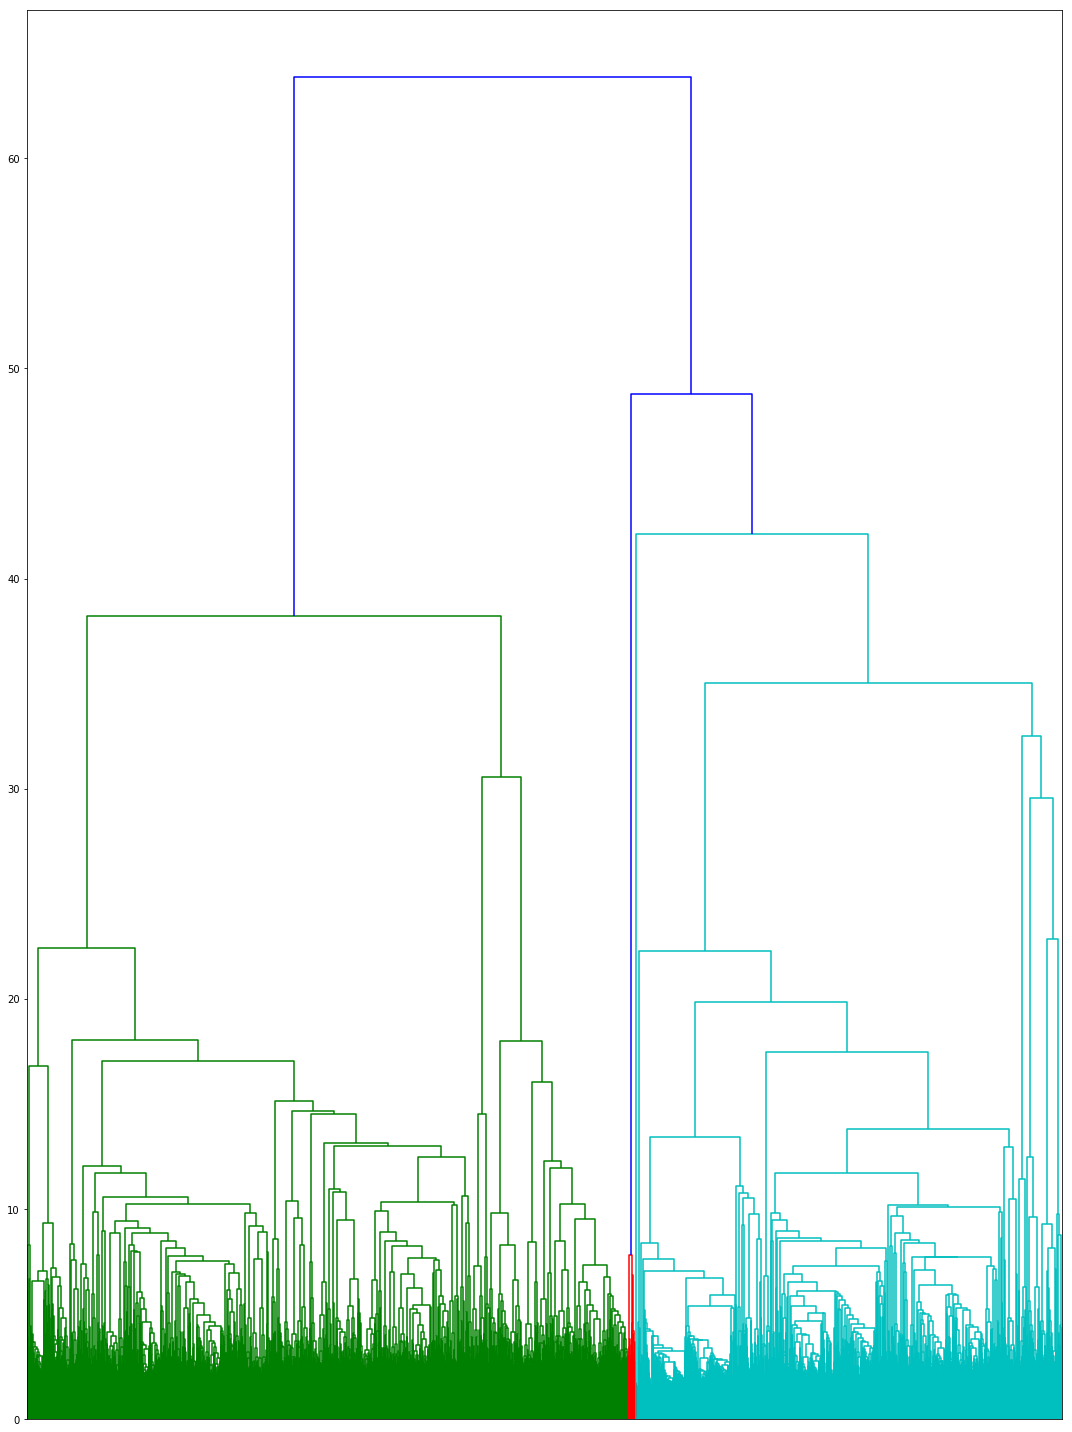

In [48]:
fig, ax = plt.subplots(figsize=(15, 20)) # set size

ax = dendrogram(
    linkage_matrix,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.show()
plt.savefig('../assets/visualizations/ward_clusters.png', dpi=200) #save figure as ward_clusters

In [51]:

fcluster(linkage_matrix, 35, criterion='distance')

array([1, 2, 2, ..., 1, 5, 5], dtype=int32)

In [52]:
train.columns

Index(['artist', 'album', 'text', 'name', 'written_precoup'], dtype='object')

In [55]:
train['cluster'] = fcluster(linkage_matrix, 35, criterion='distance')

In [59]:
train[train['cluster'] == 3]

,artist,album,text,name,written_precoup,cluster
17667,Deniz Seki,Aşk Denizi,Zülüf dökülmüş yüze aman Kaşlar yakışmış göze ...,Zülüf,0,3
17676,Deniz Toprak,Türkü Molası,GÜL YÜZÜN DÖNME BENDEN ÖLÜRÜM GEÇMEM SENDEN KA...,Gül Yüzün Dönme Benden,0,3
35874,Moğollar,Dört Renk,Ben de gittim bir geyiğin avınaAh aman aman av...,Alageyik Destanı,1,3
40181,Orhan Hakalmaz,Destegül,İki keklik bir kayada ötüyor Ötmede keklik der...,İki Keklik,1,3
55431,Zeynep Başkan,Bu Toprağın Sesleri,Dersini almışta ediyor ezber Sürmeli gözleri s...,Dersini Almışta,0,3
33863,Mahsun Kırmızıgül,Sarı Sarı,Güneşe dokunmayın o benim sıcaklığım Geceme do...,Ay Aman,0,3
6836,Aşık Veysel,Yöresel Türküler,Anlatamam derdimi dertsiz insana Dert çekmeyen...,Anlatamam Derdimi,1,3
5831,Arif Sağ,Seher Yıldızı,Erzurum Çarşı Pazar Neynim Amman Aman Neynim A...,Sarı Gelin,1,3
54821,Zara,Hazine,Seher vakti çaldım yarin kapısını Aman aman am...,Seher Vakti Çaldım Yarin Kapısını,0,3
27004,Hasret Gültekin,Rüzgarın Kanatlarında,Eklemedir koca kavak koca kavak Aman aman Nazl...,Eklemedir Koca Kavak,1,3


## Let's try again

In [ ]:
train = pd.read_csv('../assets/train.csv', index_col=0)
test = pd.read_csv('../assets/test.csv', index_col=0)

X_train = train[['artist', 'album', 'text', 'name']]
y_train = train['written_precoup']

X_test = test[['artist', 'album', 'text', 'name']]
y_test = test['written_precoup']


train_ind = X_train.index
test_ind = X_test.index

X_total = pd.concat([X_train, X_test], axis = 0, sort = True)
X_total = pd.get_dummies(X_total, columns=['artist', 'album'])
X_train = X_total.loc[train_ind, :]
X_test = X_total.loc[test_ind, :]

# cvec = CountVectorizer()
# cvec.fit(X_train['text'])

# transformed_train = pd.DataFrame(cvec.transform(X_train['text']).todense(), columns=cvec.get_feature_names())
# transformed_test = pd.DataFrame(cvec.transform(X_test['text']).todense(), columns=cvec.get_feature_names())

# X_train = pd.concat([transformed_train, X_train], axis = 1)
# X_test = pd.concat([transformed_test, X_test], axis = 1)
# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')

In [ ]:
X_train = X_train[[i for i in X_train.columns if (i != 'text') & (i != 'name')]]

In [ ]:
X_test = X_test[[i for i in X_test.columns if (i != 'text') & (i != 'name')]]

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

In [ ]:
y_test.sum()/len(y_test)

In [ ]:
lr.score(X_test, y_test)

In [ ]:
pd.DataFrame({
    'param':X_train.columns,
    'coef':lr.coef_[0]
}).sort_values(by = 'coef', ascending = False)

In [ ]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test)), fmt = 'g', annot = True)

In [2]:
train = pd.read_csv('../assets/train.csv', index_col=0)
test = pd.read_csv('../assets/test.csv', index_col=0)

corpus_train = train['name']
y_train = train['written_precoup']

corpus_test = test['name']
y_test = test['written_precoup']




# X_total = pd.concat([X_train, X_test], axis = 0, sort = True)
# X_total = pd.get_dummies(X_total, columns=['artist', 'album'])
# X_train = X_total.loc[train_ind, :]
# X_test = X_total.loc[test_ind, :]

cvec = CountVectorizer(min_df = 3, max_features=5000)
cvec.fit(corpus_train)

transformed_train = pd.DataFrame(cvec.transform(corpus_train).todense(), columns=cvec.get_feature_names())
transformed_test = pd.DataFrame(cvec.transform(corpus_test).todense(), columns=cvec.get_feature_names())

# X_train = pd.concat([transformed_train, X_train], axis = 1)
# X_test = pd.concat([transformed_test, X_test], axis = 1)
# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')

In [ ]:
lr = LogisticRegression()
lr.fit(transformed_train, y_train)

In [ ]:
sns.heatmap(confusion_matrix(y_test, lr.predict(transformed_test)), fmt = 'g', annot = True)

In [ ]:
f1_score(y_test, lr.predict(transformed_test))

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, lr.predict(transformed_test)).ravel() 

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("sens:", sensitivity)

print("spec:",specificity)

In [4]:
supvec = SVC(random_state=42, C=100000, probability=True)

In [5]:
supvec.fit(transformed_train, y_train)

SVC(C=100000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
y_pred = supvec.predict(transformed_test)

In [7]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 

sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("sens:", sensitivity)
print("spec:",specificity)

sens: 0.235042735043
spec: 0.814291030889


In [85]:
from sklearn.naive_bayes import MultinomialNB
%run ../scripts/post_scraping_text_processing.py run

df loaded.
15425 rows x 5 columns


In [98]:
train = pd.read_csv('../assets/train.csv', index_col=0)
test = pd.read_csv('../assets/test.csv', index_col=0)

corpus_train = train['name']
y_train = train['written_precoup']

corpus_test = test['name']
y_test = test['written_precoup']




# X_total = pd.concat([X_train, X_test], axis = 0, sort = True)
# X_total = pd.get_dummies(X_total, columns=['artist', 'album'])
# X_train = X_total.loc[train_ind, :]
# X_test = X_total.loc[test_ind, :]

cvec = CountVectorizer(min_df = 3, max_features=10000, ngram_range=(1,2), stop_words=STOP_WORDS)
cvec.fit(corpus_train)

transformed_train = pd.DataFrame(cvec.transform(corpus_train).todense(), columns=cvec.get_feature_names())
transformed_test = pd.DataFrame(cvec.transform(corpus_test).todense(), columns=cvec.get_feature_names())

# X_train = pd.concat([transformed_train, X_train], axis = 1)
# X_test = pd.concat([transformed_test, X_test], axis = 1)
# X_train.to_csv('X_train.csv')
# X_test.to_csv('X_test.csv')

In [104]:
mnb = MultinomialNB()

In [105]:
mnb.fit(transformed_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [106]:
y_pred = mnb.predict(transformed_test)

In [109]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

print("sens:", sensitivity)
print("spec:",specificity)

sens: 0.103418803419
spec: 0.937476739859


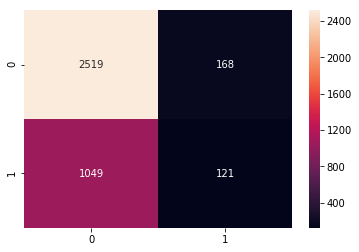

In [108]:
sns.heatmap(confusion_matrix(y_test, y_pred), fmt = 'g', annot = True)